## **ggplot: Grammar of Graphics**

A grammar of graphics is a high-level tool that allows you to create data plots in an efficient and consistent way. It abstracts most low-level details, letting you focus on creating meaningful and beautiful visualizations for your data.

plotnine is an implementation of a grammar of graphics in Python based on ggplot2. The grammar allows you to compose plots by explicitly mapping variables in a dataframe to the visual objects that make up the plot.

Plotting with a grammar of graphics is powerful. Custom (and otherwise complex) plots are easy to think about and build incremently, while the simple plots remain simple to create.

In [ ]:
pip install plotnine pandas scikit-learn

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_point, labs, theme_minimal
from sklearn import datasets

# Load Iris dataset
iris_sklearn = datasets.load_iris()
iris_df = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris_df['Species'] = iris_sklearn.target_names[iris_sklearn.target]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


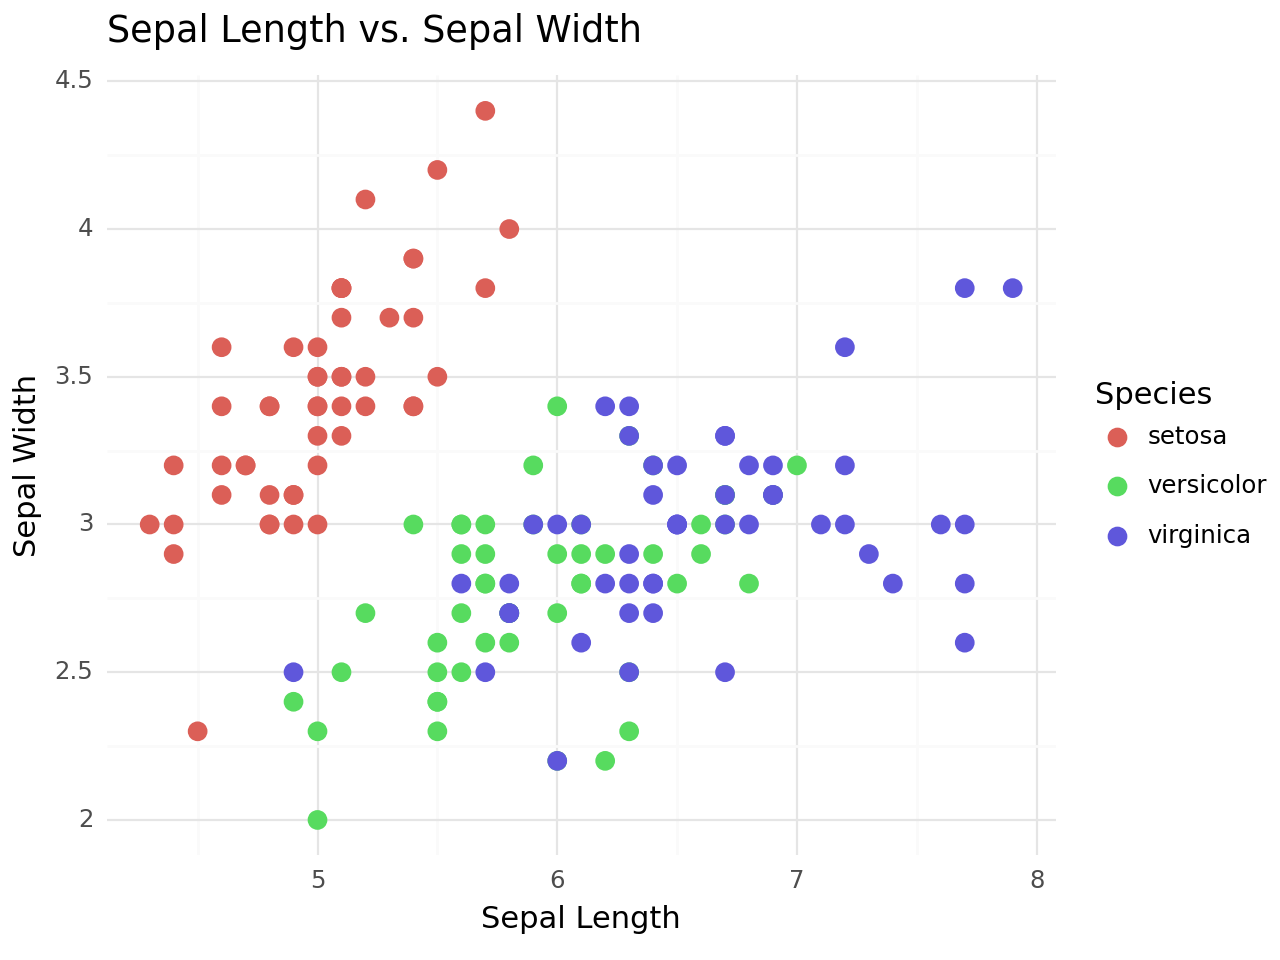

In [ ]:
# Create scatter plot for Sepal Length vs. Sepal Width
scatterplot = (
    ggplot(iris_df, aes(x='sepal length (cm)', y='sepal width (cm)', color='Species')) +
    geom_point(size=3) +
    labs(title="Sepal Length vs. Sepal Width", x="Sepal Length", y="Sepal Width") +
    theme_minimal()
)

# Print the scatter plot
print(scatterplot)


We can infer that -
*  Species Setosa has smaller sepal lengths but larger sepal widths.
*  Versicolor Species lies in the middle of the other two species in terms of sepal length and width
*  Species Virginica has larger sepal lengths but smaller sepal widths.

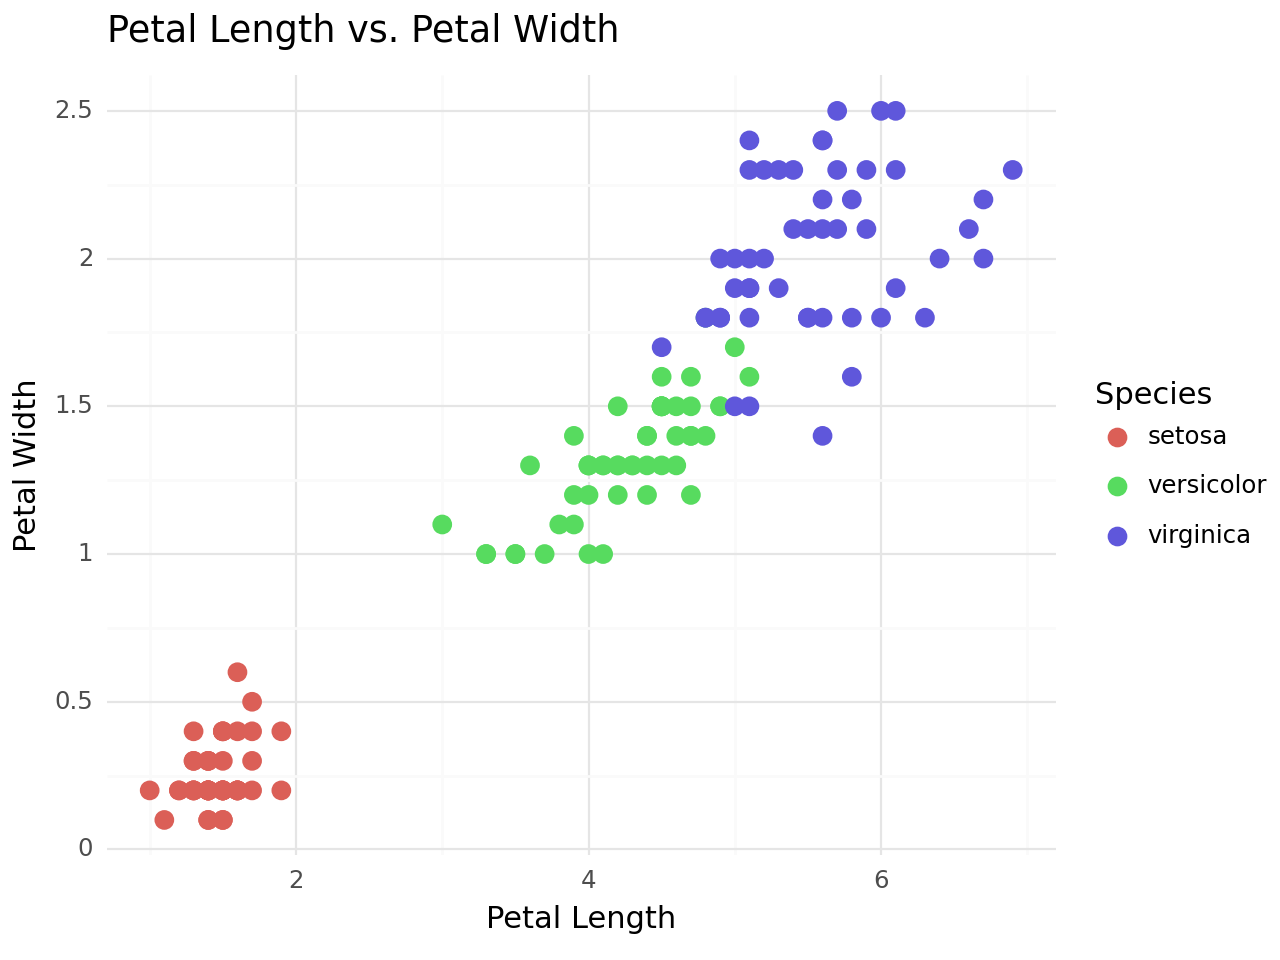

In [ ]:
# Create scatter plot for Petal Length vs. Petal Width
(ggplot(iris_df, aes(x='petal length (cm)', y='petal width (cm)', color='Species')) +
 geom_point(size=3) +
 labs(title="Petal Length vs. Petal Width", x="Petal Length", y="Petal Width") +
 theme_minimal()
).draw()

We can infer that -
*  Species Setosa has smaller petal lengths and widths.
*  Versicolor Species lies in the middle of the other two species in terms of petal length and width
*  Species Virginica has the largest of petal lengths and widths.

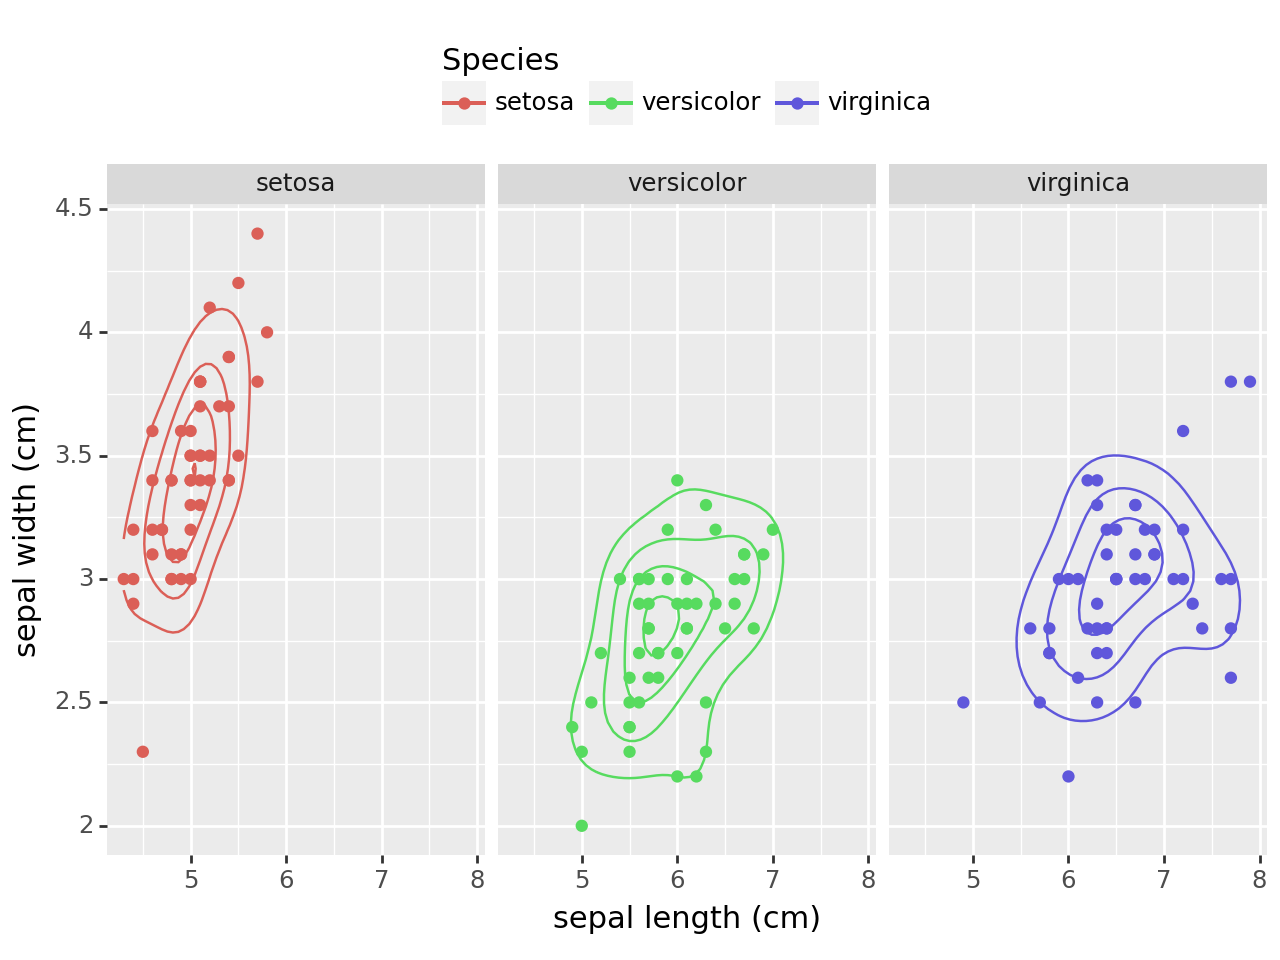

In [ ]:
# Create pair plot
plot = (
    ggplot(iris_df)
    + aes(x='sepal length (cm)', y='sepal width (cm)', color='Species')
    + geom_point()
    + geom_density_2d()
    + facet_wrap('~Species')
    + theme(legend_title=element_text(text='Species'), legend_position='top')
)

# Display the plot
print(plot)

We can infer that –
*  Sepal length and width appear to be positively correlated for all three species. This means that as sepal length increases, sepal width also tends to increase.
*  There seems to be some overlap between the different species in terms of their measurements. However, there is also some separation, which allows us to distinguish between the species to some extent based on their sepal and petal dimensions. For instance, setosa flowers tend to have smaller sepals and petals compared to versicolor and virginica flowers.

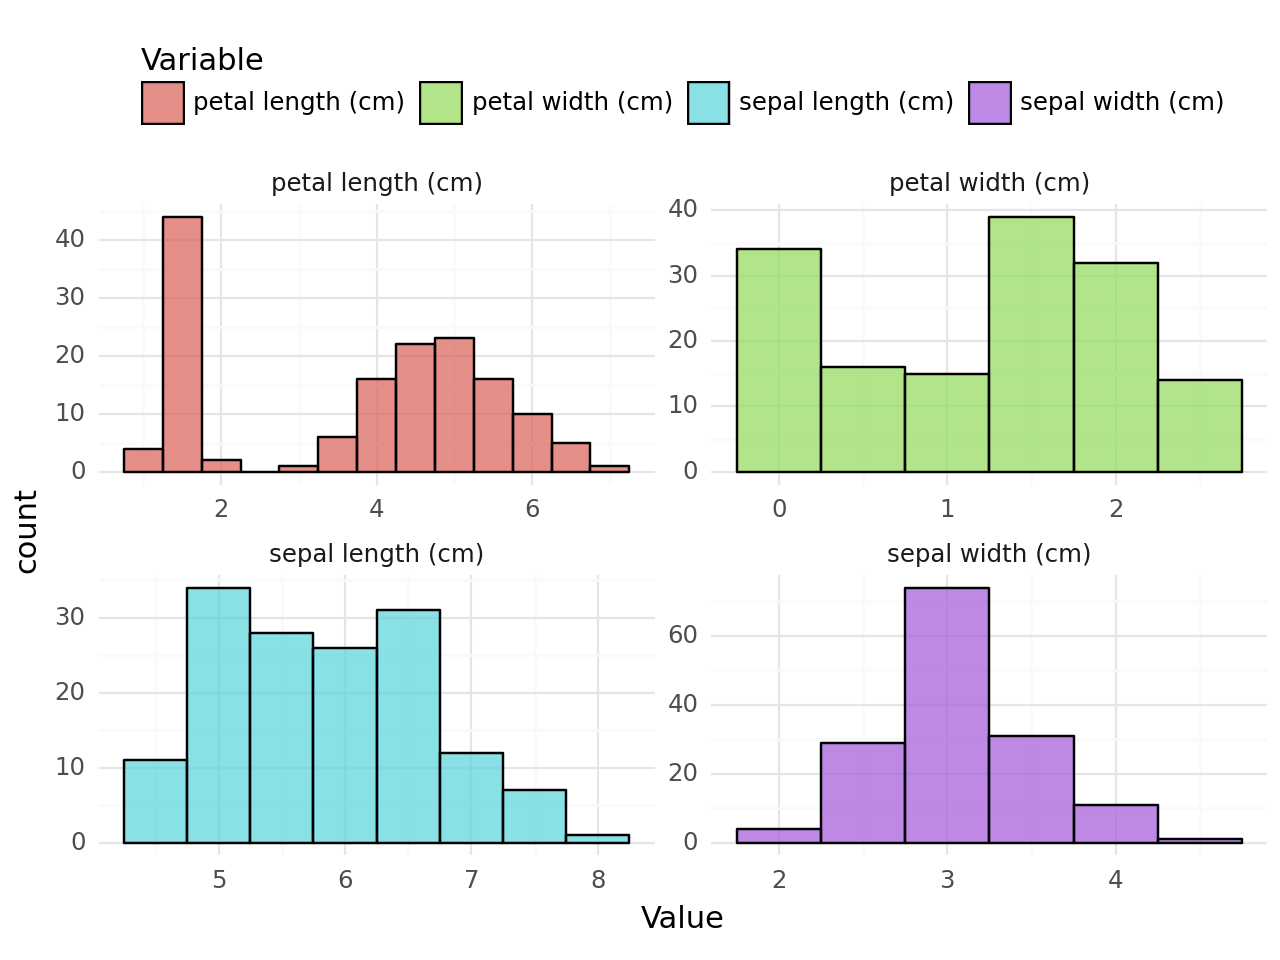

In [ ]:
# Create histograms
plot = (
    ggplot(iris_melted)
    + aes(x='Value', fill='Variable')
    + geom_histogram(binwidth=0.5, color='black', alpha=0.7)
    + facet_wrap('~Variable', scales='free')
    + theme_minimal()
    + theme(legend_title=element_text(text='Variable'), legend_position='top')
)

# Display the plot
print(plot)

We can infer that –
*  The highest frequency of the petal length is around 50
*  The highest frequency of the petal width is between 30 and 40
*  The highest frequency of the sepal length is between 30 and 35
*  The highest frequency of the sepal Width is around 70

<ipython-input-76-2c55c2523e7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


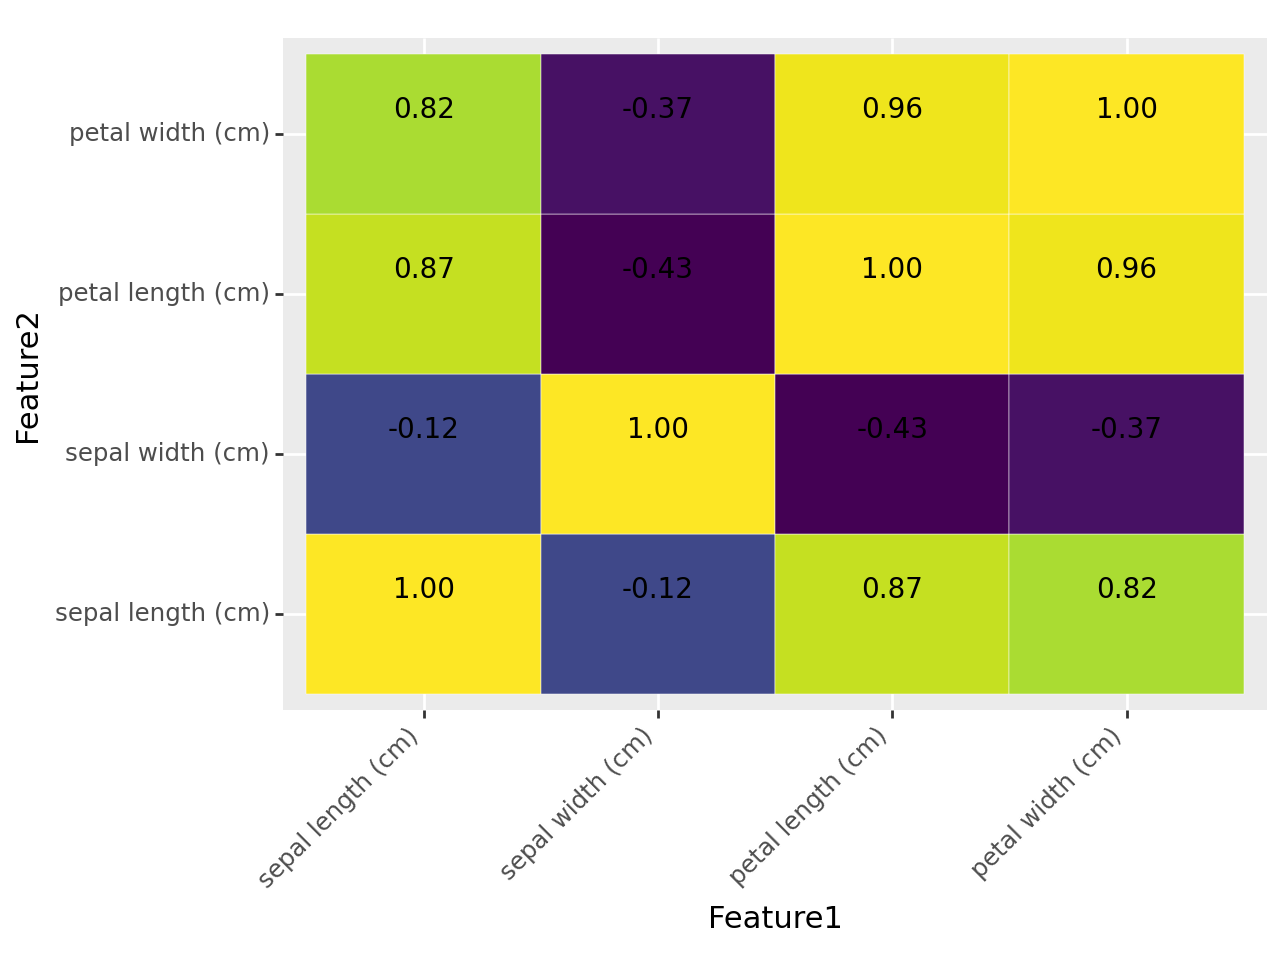

In [ ]:
# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Create a dataframe from the correlation matrix for plotting
correlation_df = correlation_matrix.stack().reset_index()
correlation_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Define the desired order of variables
variable_order = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Update the dataframe to control the order of variables
correlation_df['Feature1'] = pd.Categorical(correlation_df['Feature1'], categories=variable_order, ordered=True)
correlation_df['Feature2'] = pd.Categorical(correlation_df['Feature2'], categories=variable_order, ordered=True)

# Create the heatmap plot
heatmap_plot = (
    ggplot(correlation_df, aes(x='Feature1', y='Feature2', fill='Correlation', label='Correlation'))
    + geom_tile(color='white')
    + geom_text(aes(label='Correlation'), size=10, color='black', format_string='{:.2f}', nudge_y=0.15)
    + theme(axis_text_x=element_text(angle=45, hjust=1))
    + theme(legend_title=element_text(text=''), legend_position='none')  # Remove legends
)

# Display the heatmap plot
print(heatmap_plot)


We can infer that -
*  Petal width and petal length have high correlations.
*  Petal Width and Sepal length have good correlations.

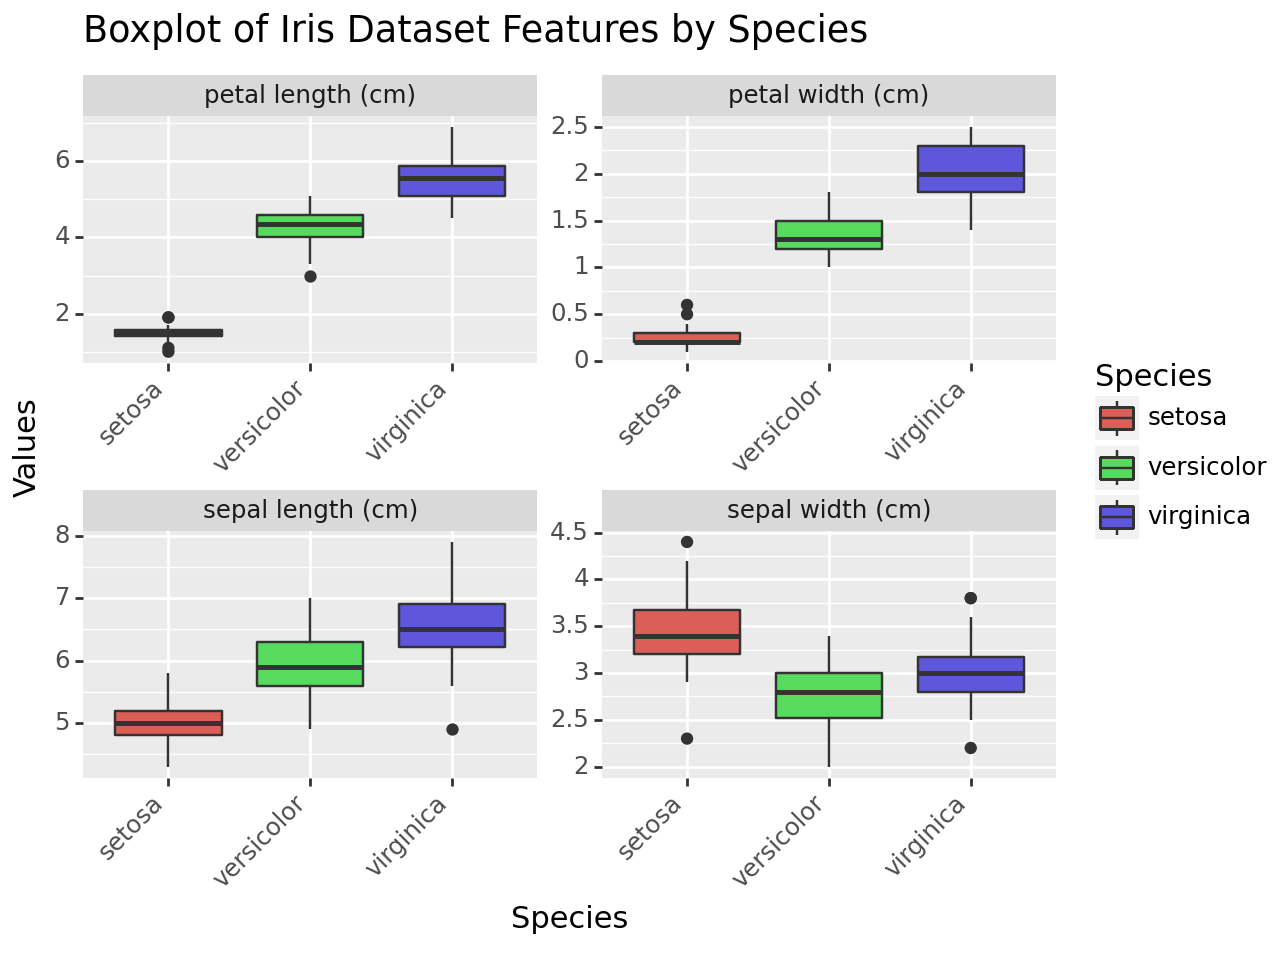

In [ ]:
# Convert the dataset into long format for boxplot
iris_long = pd.melt(iris_df, id_vars='Species', var_name='Features', value_name='Values')

# Create the boxplot using plotnine (ggplot)
boxplot = (
    ggplot(iris_long, aes(x='Species', y='Values', fill='Species'))
    + geom_boxplot()
    + labs(title="Boxplot of Iris Dataset Features by Species",
           x="Species", y="Values", fill="Species")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + facet_wrap('~Features', scales='free')
)

# Print the boxplot
print(boxplot)


We can infer that -
*  Species Setosa has the smallest features and less distributed with some outliers.
*  Species Versicolor has the average features.
*  Species Virginica has the highest features